<a href="https://colab.research.google.com/github/waveology/aire/blob/main/4_caracterizaci%C3%B3n_estadistica_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caracterización estadística de los datos

Vamos a explorar algunas posibilidades de análisis de datos de calidad del aire que ofrece Python. Usaremos como hasta ahora datos meteorológicos de AEMET y de contaminación de la Comunidad de Madrid.

###1. Preparación de datos y código
---

Descargamos el repositorio de código y datos para trabajar más cómodamente:

In [ ]:
# Borramos copias previas y clonamos el repositorio 
# ------------------------------------------------------------
#!rm -rf aire && git clone https://github.com/waveology/aire.git
#%cd aire
!wget https://raw.githubusercontent.com/waveology/aire/main/lectura_de_datos.py -O lectura_de_datos.py


Importamos las extensiones que vamos a necesitar. 

Para simplificar la tarea hemos empaquetado las funciones de lectura de datos en un fichero independiente (lectura_de_datos.py) 

In [ ]:
import lectura_de_datos           # lee ficheros de datos meteorológicos y de contaminación de Madrid
import matplotlib.pyplot as plt   # dibujo de gráficos
from scipy import stats           # cálculo estadístico

###2. Inventario de datos
---

####Estaciones de medida
**Código | Municipio | Nombre**

---
*       28005002   :    (  5,  'ALCALÁ DE HENARES'), 
*       28006004   :    (  6,  'ALCOBENDAS'), 
*       28007004   :    (  7,  'ALCORCÓN'), 
*       28009001   :	(  9,  'ALGETE'), 
*       28013002   :	( 13,  'ARANJUEZ'), 
*       28014002   :	( 14,  'ARGANDA DEL REY'),
*       28016001   :	( 16,  'EL ATAZAR'),
*       28045002   :	( 45,  'COLMENAR VIEJO'), 
*       28047002   :	( 47,  'COLLADO VILLALBA'), 
*       28049003   :	( 49,  'COSLADA'), 
*       28058004   :	( 58,  'FUENLABRADA'), 
*       28065014   :	( 65,  'GETAFE'), 
*       28067001   :	( 67,  'GUADALIX DE LA SIERRA'), 
*       28074007   :	( 74,  'LEGANÉS'), 
*       28080003   :	( 80,  'MAJADAHONDA'), 
*       28092005   :	( 92,  'MÓSTOLES'), 
*       28102001   :	(102,  'ORUSCO DE TAJUÑA'), 
*       28120001   : 	(120,  'PUERTO DE COTOS'), 
*       28123002   :	(123,  'RIVAS-VACIAMADRID'), 
*       28133002   :	(133,  'SAN MARTÍN DE VALDEIGLESIAS'), 
*       28148004   :	(148,  'TORREJÓN DE ARDOZ'), 
*       28161001   :	(161,  'VALDEMORO'), 
*       28171001   :	(171,  'VILLA DEL PRADO'), 
*       28180001   :	(180,  'VILLAREJO DE SALVANÉS')


####Contaminantes
**Código  |  Magnitud  | Unidades**

  
---
*      1 	:  ('Dióxido de azufre', 'μg/m³'),
*      6 	:  ('Monóxido de carbono', 'mg/m³'),
*      7 	:  ('Monóxido de nitrógeno', 'μg/m³'),
*      8 	:  ('Dióxido de nitrógeno', 'μg/m³'),
*      9 	:  ('Partículas en suspensión < PM2.5', 'μg/m³'),
*     10 	:  ('Partículas en suspensión < PM10',  'μg/m³'),
*     12 	:  ('Óxidos de nitrógeno', 'μg/m³'),
*     14 	:  ('Ozono', 'μg/m³'),
*     20 	:  ('Tolueno', 'μg/m³'),
*     22 	:  ('Black Carbon', 'μg/m³'),
*     30 	:  ('Benceno', 'μg/m³'),
*     42 	:  ('Hidrocarburos totales', 'mg/m³'),
*     44 	:  ('Hidrocarburos no metánicos', 'mg/m³'),
*    431  :  ('MetaParaXileno', 'μg/m³')
    }

####Meteorología
**Código | Magnitud | Unidades**

---
*   81 :	('Velocidad del viento',     'm/s'), 
*   82 :	('Dirección del viento',     'º'), 
*   83 :	('Temperatura',              'ºC'), 
*   86 :	('Humedad relativa',         '%'), 
*   87 :	('Presión atmosférica',      'hPa'), 
*   88 :	('Radiación solar',          'W/m2'), 
*   89 :	('Precipitación',            'mm')

###3. Carga de datos
---

Vamos a cargar datos de concentración de NO2 en la ciudad de Móstoles en el año 2019: 

In [8]:
codigo_magnitud  =        8     # Temperatura
codigo_estacion  = 28092005     # Guadalix de la Sierra
anio             =     2019

Esta versión de la funcion lectura_de_datos devuelve, además del dataframe con los datos, el nombre de la estación, la magnitud medida y sus unidades. Eso facilita la automatización de los gráficos:

In [11]:
df, magnitud, unidades,estacion = lectura_de_datos.comunidad('datos/comunidad/%s.csv' % anio,
                                                          codigo_magnitud = codigo_magnitud, 
                                                          codigo_estacion = codigo_estacion) 
print(df)

 -Info: encontrados datos de 365 días
                     valor
fecha                     
2019-01-01 01:00:00   93.0
2019-01-01 02:00:00   84.0
2019-01-01 03:00:00   93.0
2019-01-01 04:00:00   83.0
2019-01-01 05:00:00   84.0
...                    ...
2019-12-31 20:00:00   56.0
2019-12-31 21:00:00   68.0
2019-12-31 22:00:00   74.0
2019-12-31 23:00:00   66.0
2020-01-01 00:00:00   51.0

[8654 rows x 1 columns]


###4. Representación gráfica
---

Representamos los resultados en un gráfico simple X-Y

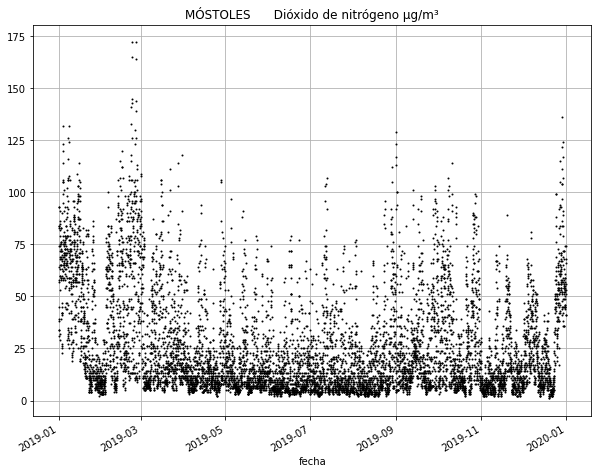

In [29]:
df.plot(marker='o',                                           # Símbolo
        ms=1,                                                 # Tamaño del símbolo
        lw=0,                                                 # Grosor de líneas de conexión
        color='black',                                        # Color
        grid=True,                                            # Rejilla
        figsize=(10,8),                                       # Tamaño del gráfico
        legend=False,                                         # Leyenda
        title='%s      %s %s' % (estacion,magnitud,unidades)  # Título
        )

###5. El histograma
---

Text(0.5, 0, 'μg/m³')

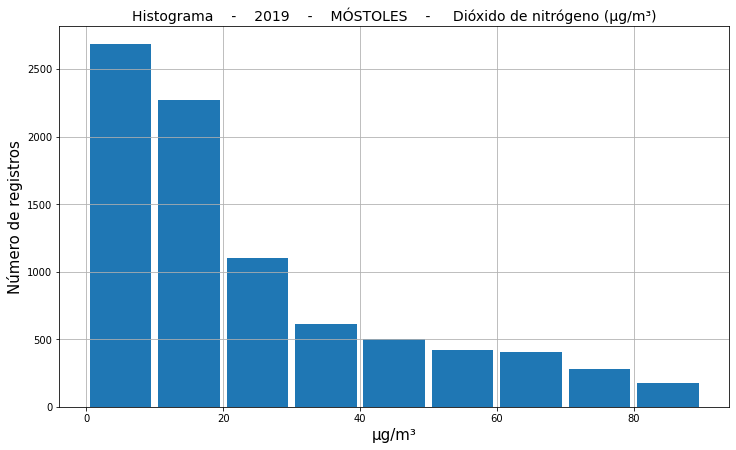

In [71]:
fig, ax = plt.subplots(figsize=(12,7))
df.hist(
         bins     =  range(0,100,10),
         stacked  =  False,
         density  =  False,
         log      =  False,  
         rwidth   =  0.9,
         ax       =  ax
)
ax.set_title('Histograma    -    %s    -    %s    -     %s (%s)' % (anio,estacion,magnitud,unidades),size=14)
ax.set_ylabel('Número de registros',size=15)
#ax.set_ylabel('Frecuencia estadística',size=15)
ax.set_xlabel(unidades,size=15)